<a href="https://colab.research.google.com/github/perigee/musee/blob/master/musee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Musee

In [1]:
import matplotlib.pyplot as plt


In [2]:
from datasource import getDatasource

In [3]:
mdata = getDatasource()

In [4]:
mdata

,museum,city,visitors,year,population
0,Louvre,paris,8.100000,2017,10.840
1,Centre Pompidou,paris,3.371000,2017,10.840
2,Musée d'Orsay,paris,3.178000,2017,10.840
3,Cité des Sciences et de l'Industrie,paris,2.439000,2017,10.840
4,National Museum of China,beijing,8.062625,2017,21.710
5,China Science and Technology Museum,beijing,3.983000,2017,21.710
6,National Air and Space Museum,washington d.c.,7.000000,2017,0.700
7,National Museum of Natural History,washington d.c.,6.000000,2017,0.700
8,National Gallery of Art,washington d.c.,5.232000,2017,0.700
9,National Museum of American History,washington d.c.,3.800000,2017,0.700


In [5]:
mdata['p/v']=mdata['population']/mdata['visitors']

In [6]:
mdata

,museum,city,visitors,year,population,p/v
0,Louvre,paris,8.100000,2017,10.840,1.338272
1,Centre Pompidou,paris,3.371000,2017,10.840,3.215663
2,Musée d'Orsay,paris,3.178000,2017,10.840,3.410950
3,Cité des Sciences et de l'Industrie,paris,2.439000,2017,10.840,4.444444
4,National Museum of China,beijing,8.062625,2017,21.710,2.692671
5,China Science and Technology Museum,beijing,3.983000,2017,21.710,5.450665
6,National Air and Space Museum,washington d.c.,7.000000,2017,0.700,0.100000
7,National Museum of Natural History,washington d.c.,6.000000,2017,0.700,0.116667
8,National Gallery of Art,washington d.c.,5.232000,2017,0.700,0.133792
9,National Museum of American History,washington d.c.,3.800000,2017,0.700,0.184211


In [7]:
import statsmodels.api as sm

In [8]:
from sklearn import linear_model

In [9]:
model = sm.OLS(mdata['visitors'], mdata['population']).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               visitors   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     49.98
Date:                Sun, 20 Jan 2019   Prob (F-statistic):           3.18e-09
Time:                        18:41:22   Log-Likelihood:                -135.77
No. Observations:                  55   AIC:                             273.5
Df Residuals:                      54   BIC:                             275.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.1929      0.027      7.069      0.000       0.138       0.248
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                0.901
Skew:                          -0.245   Prob(JB):                        0.637
Kurtosis:                       3.390   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

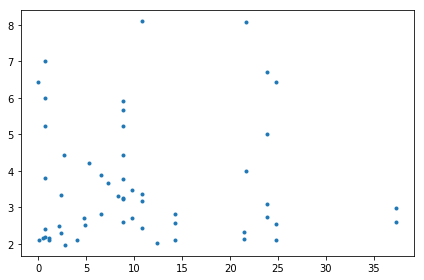

In [12]:
plt.plot(mdata['population'], mdata['visitors'], marker='.', linestyle='none')
plt.tight_layout()

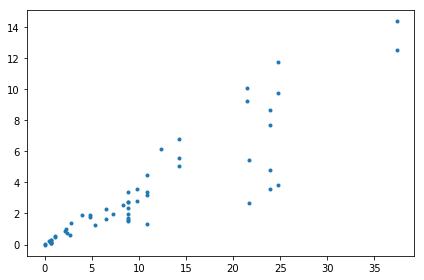

In [13]:
plt.plot(mdata['population'], mdata['p/v'], marker='.', linestyle='none')
plt.tight_layout()

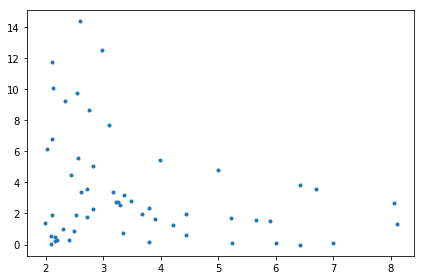

In [14]:
plt.plot(mdata['visitors'], mdata['p/v'], marker='.', linestyle='none')
plt.tight_layout()

In [15]:
from sklearn.cluster import KMeans

In [44]:
X = mdata[['population', 'visitors']]
import numpy as np
X = X.values
X

array([[1.084000e+01, 8.100000e+00],
       [1.084000e+01, 3.371000e+00],
       [1.084000e+01, 3.178000e+00],
       [1.084000e+01, 2.439000e+00],
       [2.171000e+01, 8.062625e+00],
       [2.171000e+01, 3.983000e+00],
       [7.000000e-01, 7.000000e+00],
       [7.000000e-01, 6.000000e+00],
       [7.000000e-01, 5.232000e+00],
       [7.000000e-01, 3.800000e+00],
       [7.000000e-01, 2.400000e+00],
       [2.387000e+01, 6.692909e+00],
       [2.387000e+01, 5.000000e+00],
       [2.387000e+01, 3.100000e+00],
       [2.387000e+01, 2.750000e+00],
       [1.000000e-03, 6.427277e+00],
       [2.480000e+01, 6.421000e+00],
       [2.480000e+01, 2.550000e+00],
       [2.480000e+01, 2.109200e+00],
       [8.820000e+00, 5.906716e+00],
       [8.820000e+00, 5.656004e+00],
       [8.820000e+00, 5.229192e+00],
       [8.820000e+00, 4.435000e+00],
       [8.820000e+00, 3.789748e+00],
       [8.820000e+00, 3.251000e+00],
       [8.820000e+00, 3.223350e+00],
       [8.820000e+00, 2.607099e+00],
 

In [60]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [61]:
kmeans.labels_

array([3, 3, 3, 3, 2, 2, 0, 0, 0, 5, 5, 2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 6, 6, 6, 6, 3, 3, 5, 3, 4, 4, 1, 1, 1, 6, 6, 5,
       5, 2, 2, 5, 5, 5, 5, 5, 5, 6, 1], dtype=int32)

In [62]:
kmeans.cluster_centers_

array([[ 0.52525   ,  6.16481925],
       [13.825     ,  2.3815    ],
       [23.3       ,  4.10366491],
       [ 9.45266667,  4.04511433],
       [37.34      ,  2.7935    ],
       [ 1.43416667,  2.62388342],
       [ 5.6       ,  3.13616586]])

In [63]:
y_kmeans = kmeans.predict(X)

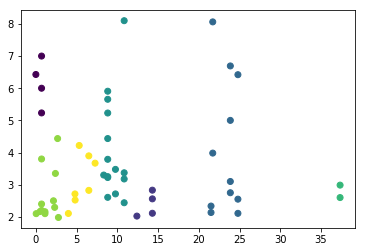

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

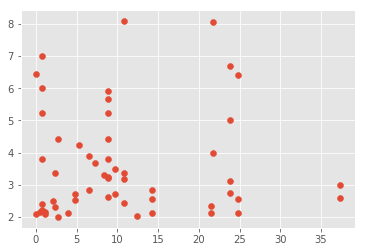

In [65]:
import matplotlib
matplotlib.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1])

In [67]:
Y = mdata[['population', 'visitors']]

In [68]:
Y.corr()

,population,visitors
population,1.000000,0.036388
visitors,0.036388,1.000000


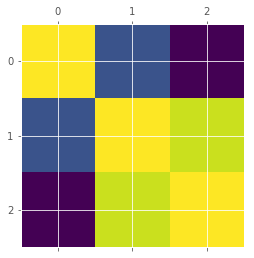

In [69]:
plt.matshow(mdata.corr())

In [70]:
import matplotlib.pyplot as plt

In [72]:
import seaborn as sns

In [73]:
sns.pairplot(mdata[['population']]

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>